In [1]:
import lightkurve as lk
import george
import numpy as np
import matplotlib.pyplot as plt
import tessreduce as tr
from gp_2d_fit import gp_2d_fit
import numpy as np

In [13]:
search_result = lk.search_tesscut('ZTF18adaifep')
tpf = search_result.download(cutout_size=90)

#res = tr.Quick_reduce(tpf, calibrate=False)

/Users/rridden/miniconda3/lib/python3.7/site-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


In [14]:
mask = tr.Make_mask(tpf,maglim=19,strapsize=3)
bkg = tr.New_background(tpf,mask)
flux = tpf.flux.value - bkg
ref = flux[100]
offset = tr.Centroids_DAO(flux,ref,TPF=tpf,parallel=False)
reduced = tr.Shift_images(offset,flux)

/Users/rridden/miniconda3/lib/python3.7/site-packages/tessreduce/tessreduce.py:544: LightkurveDeprecationWarning: The astropy_time function is deprecated and may be removed in a future version.
        Use time instead.
  split = np.where(np.diff(tpf.astropy_time.mjd) > 0.5)[0][0] + 1


(13, 987, 5, 5)
GP initial guess computed
values predicted


/Users/rridden/Documents/work/code/SynDiff/development/gp_fitting/gp_2d_fit.py:43: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x2 = np.hstack([i]*N for i in range(0, N))


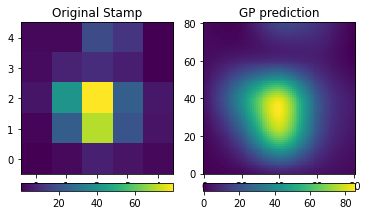

In [11]:
flux = reduced
med_frame = tr.Get_ref(flux)
tab = tr.Unified_catalog(tpf, magnitude_limit=18)

col = tab.col.values
row = tab.row.values
pos = np.array([col, row]).T
index, med_cut, stamps = tr.Isolated_stars(pos, tab['tmag'].values, flux, med_frame, Distance=5, Aperture=5)

test_stamp = stamps[0][100]
print(stamps.shape)

# GP interpolation
pred_stamp = gp_2d_fit(test_stamp, kernel='matern32')

# plot prediction
fig = plt.subplot(1, 2, 1)

plt.imshow(test_stamp, cmap='viridis', aspect=1, interpolation='nearest',  origin='lower')
plt.title('Original Stamp')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)

plt.subplot(1 ,2, 2)
plt.imshow(pred_stamp, cmap='viridis', aspect=1, interpolation='nearest', origin='lower')
plt.title('GP prediction')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.show()


In [8]:
a = []
for i in range(len(stamps)):
    test_stamp = stamps[i][100]
    print(stamps.shape)

    # GP interpolation
    pred_stamp = gp_2d_fit(test_stamp, kernel='matern32')
    a += [pred_stamp]
a = np.array(a)

(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted
(13, 987, 5, 5)
GP initial guess computed
values predicted


In [9]:
b = np.nanmedian(a,axis=0)

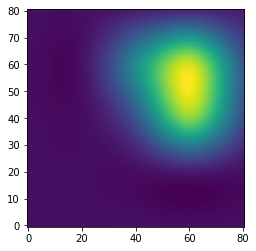

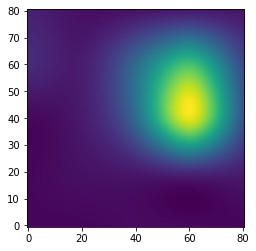

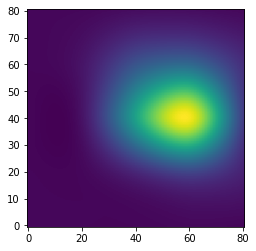

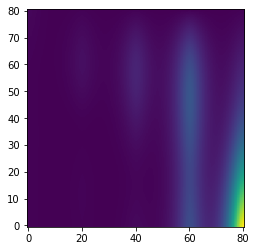

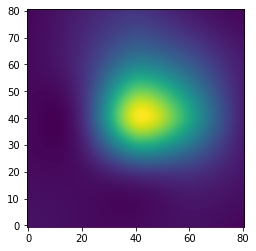

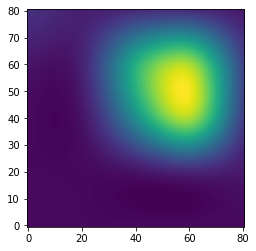

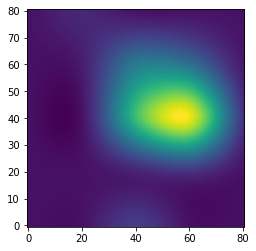

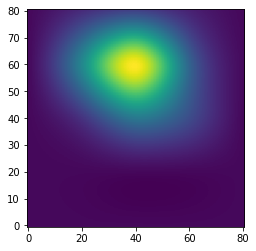

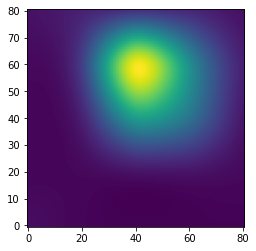

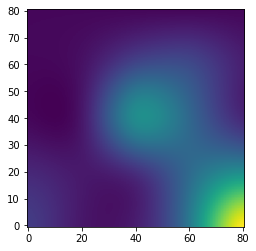

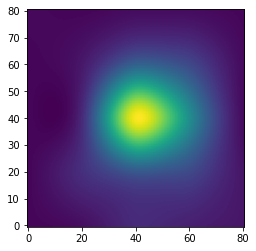

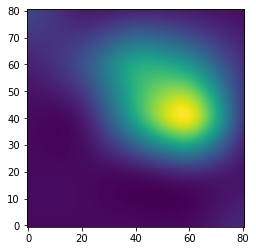

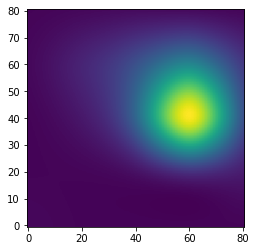

In [15]:
for i in a:
    plt.figure()
    plt.imshow(i,origin='lower')